<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf2/tf-dense-insurance-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Gives us a well defined version of tensorflow

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# will also work, but nightly build might contain surprises

# !pip install -q tf-nightly-gpu-2.0-preview

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/DJCordhose/ml-workshop/master/data/insurance-customers-1500.csv', sep=';')

In [0]:
y = df['group'].values
X = df.drop('group', axis='columns').values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
from tensorflow.keras.layers import Input, Dense

num_features = 3
num_categories = 3


model = keras.Sequential()

model.add(Input(name='input', shape=(num_features,)))

model.add(Dense(name='hidden',units=500, activation='relu'))

model.add(Dense(name='output', units=num_categories, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 500)               2000      
_________________________________________________________________
output (Dense)               (None, 3)                 1503      
Total params: 3,503
Trainable params: 3,503
Non-trainable params: 0
_________________________________________________________________


In [8]:
%%time 

BATCH_SIZE=1000
EPOCHS = 2000

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=0)

W0820 09:49:42.893007 139826095617920 deprecation.py:323] From /tensorflow-2.0.0b1/python3.6/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


CPU times: user 14.3 s, sys: 1.12 s, total: 15.4 s
Wall time: 12.6 s


In [9]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE)
train_loss, train_accuracy

1200/1200 [==============================] - 0s 30us/sample - loss: 0.6229 - accuracy: 0.7492


(0.6228600839773814, 0.74916667)

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
test_loss, test_accuracy

300/300 [==============================] - 0s 60us/sample - loss: 0.6541 - accuracy: 0.7533


(0.6540542840957642, 0.75333333)

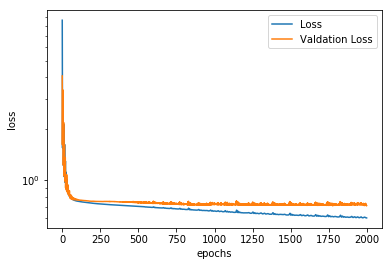

In [11]:
plt.yscale('log')

plt.ylabel("loss")
plt.xlabel("epochs")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(["Loss", "Valdation Loss"])

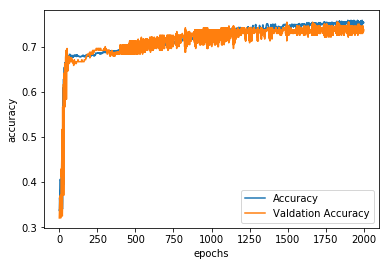

In [12]:
plt.ylabel("accuracy")
plt.xlabel("epochs")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(["Accuracy", "Valdation Accuracy"])

In [13]:
# category 1 should have the highest probability
model.predict(np.array([[100, 48, 10]]))

array([[0.03248871, 0.917868  , 0.04964322]], dtype=float32)

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
test_accuracy

300/300 [==============================] - 0s 14us/sample - loss: 0.6541 - accuracy: 0.7533


0.75333333

In [0]:
assert model.predict(np.array([[100, 48, 10]])).argmax() == 1